In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
zkc_graph = nx.karate_club_graph()

In [3]:
club_labels = nx.get_node_attributes(zkc_graph, 'club')
print({key:club_labels[key] for key in range(10,16)})

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


In [4]:
mr_hi = 0
john_a = 33

In [5]:
a = nx.convert_matrix.to_numpy_array(zkc_graph)
print(a)

[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]


In [6]:
pos = nx.circular_layout(zkc_graph)

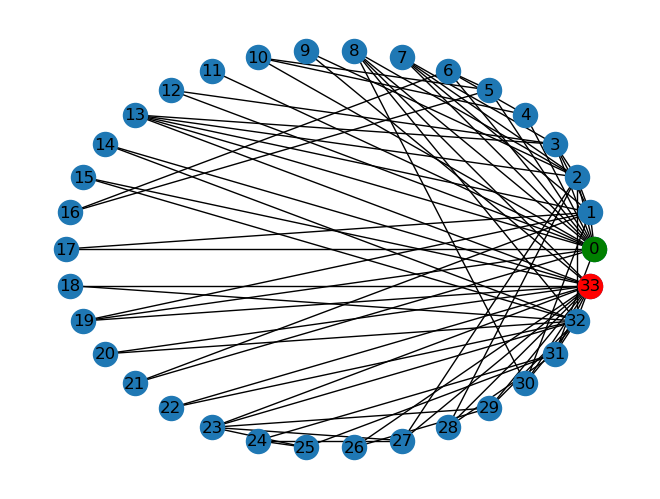

In [7]:
nx.draw(zkc_graph, pos, with_labels=True)
nx.draw_networkx_nodes(zkc_graph, pos, nodelist=[mr_hi], node_color=["g"], alpha=1)
nx.draw_networkx_nodes(zkc_graph, pos, nodelist=[john_a], node_color=["r"], alpha=1)

In [8]:
density = nx.density(zkc_graph)
density

0.13903743315508021

In [9]:
deg = []
degree = nx.degree(zkc_graph)
for (key, value) in degree:
    deg.append(value)
avg_deg = sum(deg)/len(deg)
avg_deg

4.588235294117647

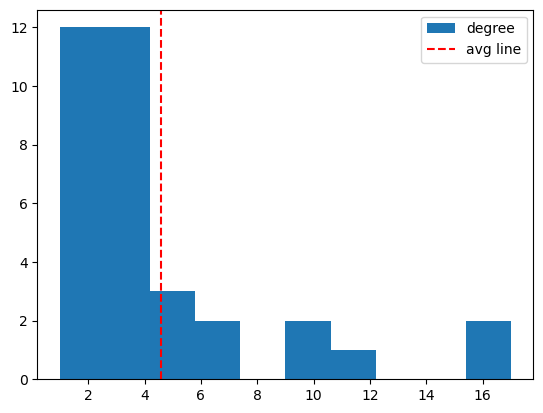

In [10]:
plt.hist(deg, label="degree")
plt.axvline(avg_deg, color="red", label="avg line", linestyle="dashed")
plt.legend()
plt.show()

In [11]:
coef = nx.algorithms.cluster.clustering(zkc_graph)
av_coef = sum(coef.values())/len(coef.values())
print(av_coef)

0.5706384782076823


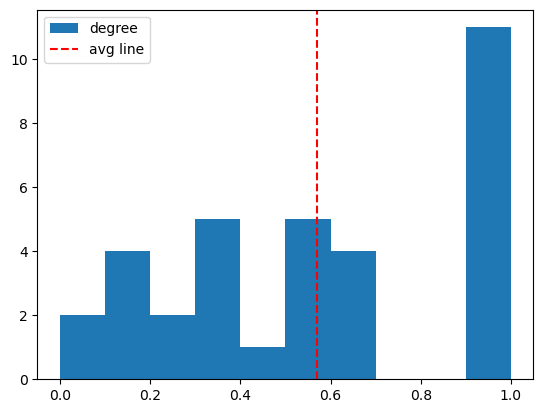

In [12]:
plt.hist(coef.values(), label="degree")
plt.axvline(av_coef, color="red", label="avg line", linestyle="dashed")
plt.legend()
plt.show()

In [13]:
c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(zkc_graph))
print(len(c))

3


In [14]:
com_0 = sorted(c[0])
com_1 = sorted(c[1])
com_2 = sorted(c[2])

print(com_0)
print(com_1)
print(com_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


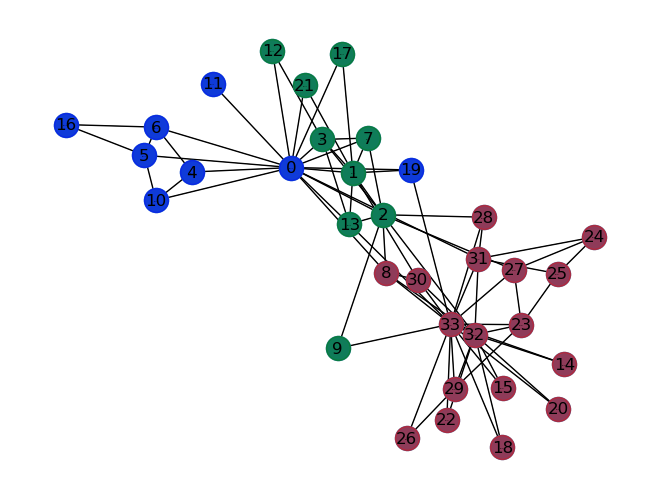

In [15]:
pos = nx.spring_layout(zkc_graph)
# pos = nx.circular_layout(zkc_graph)
nx.draw(zkc_graph, pos, with_labels=True)
nx.draw_networkx_nodes(zkc_graph, pos, nodelist=com_0, node_color="red", alpha=.5)
nx.draw_networkx_nodes(zkc_graph, pos, nodelist=com_1, node_color="green", alpha=.5)
nx.draw_networkx_nodes(zkc_graph, pos, nodelist=com_2, node_color="blue", alpha=.5)

nx.draw_networkx_edges(zkc_graph, pos, width=.2)
nx.draw_networkx_labels(zkc_graph, pos, club_labels, font_size=.9)
plt.show()